In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as pyo
import matplotlib
import numpy as np

In [2]:
df_total_medallas=pd.read_csv("df_total_medallas.csv")
medallistas=pd.read_csv("medallistas.csv")

In [3]:
lista_disciplinas=[]
for i in medallistas["Sport"].unique():
    lista_disciplinas.append(i)

In [4]:
len(lista_disciplinas)

57

In [5]:
medallistas

,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...
36493,ZOU Jingyuan,M,23.0,158.0,NaN,People's Republic of China,CHN,2021,Tokyo,Gymnastics,Artistic Gymnastics,Gold
36494,ZUBIMENDI Martin,M,22.0,180.0,NaN,Spain,ESP,2021,Tokyo,Football,Men,Silver
36495,ZUEV Alexander,M,25.0,193.0,NaN,ROC,ROC,2021,Tokyo,3x3 Basketball,Men,Silver
36496,ZVEREV Alexander,M,24.0,198.0,NaN,Germany,GER,2021,Tokyo,Tennis,Men's Singles,Gold


In [6]:
acumulado_por_anio=pd.read_csv("data/acumulado_medallas_por_anio.txt",sep="\t")

In [7]:
acumulado_por_anio

,NOC,Year,City,Columna2,Sport
0,GRE,1896,Athina,GRE_Swimming,Swimming
1,GRE,1896,Athina,GRE_Gymnastics,Gymnastics
2,GBR,1896,Athina,GBR_Cycling,Cycling
3,USA,1896,Athina,USA_Athletics,Athletics
4,GER,1896,Athina,GER_Gymnastics,Gymnastics
...,...,...,...,...,...
1303,CHN,2021,Tokyo,CHN_3x3 Basketball,3x3 Basketball
1304,TPE,2021,Tokyo,TPE_Karate,Karate
1305,AUS,2021,Tokyo,AUS_Surfing,Surfing
1306,TPE,2021,Tokyo,TPE_Judo,Judo


In [8]:
# Agrupamos por año y país y contamos el número de deportes distintos que se practicaron en cada año y país
acumulado_por_anio_count = acumulado_por_anio.groupby(['Year', 'NOC'])['Sport'].apply(lambda x: len(x.unique())).reset_index()
acumulado_por_anio_count.columns = ['Year', 'NOC', 'Count']

# Obtenemos la suma acumulada de deportes distintos que se practicaron en cada año y país
acumulado_por_anio_count['Acumulado'] = acumulado_por_anio_count.groupby('NOC')['Count'].cumsum()

# Imprimimos el resultado
print(acumulado_por_anio_count)

     Year  NOC  Count  Acumulado
0    1896  AUS      2          2
1    1896  AUT      2          2
2    1896  DEN      3          3
3    1896  FRA      3          3
4    1896  GBR      4          4
..    ...  ...    ...        ...
735  2021  TPE      6         12
736  2021  TUR      3          9
737  2021  UKR      2         21
738  2021  USA      5         44
739  2021  UZB      1          7

[740 rows x 4 columns]


In [9]:
acumulado_por_anio_count.sort_values(by="Acumulado")

,Year,NOC,Count,Acumulado
274,1964,KEN,1,1
517,2000,MKD,1,1
629,2012,GRN,1,1
230,1952,VEN,1,1
630,2012,GUA,1,1
...,...,...,...,...
664,2016,GBR,2,37
710,2021,GBR,1,38
532,2000,USA,1,38
574,2004,USA,1,39


In [10]:
oro_acumulado_por_anio=pd.read_csv("data/acumulado_oros_por_anio.txt",sep="\t")

In [11]:

# Agrupamos por año y país y contamos el número de deportes distintos que se practicaron en cada año y país
oro_acumulado_por_anio_count = oro_acumulado_por_anio.groupby(['Year', 'NOC'])['Sport'].apply(lambda x: len(x.unique())).reset_index()
oro_acumulado_por_anio_count.columns = ['Year', 'NOC', 'Count']

# Obtenemos la suma acumulada de deportes distintos que se practicaron en cada año y país
oro_acumulado_por_anio_count['Acumulado'] = oro_acumulado_por_anio_count.groupby('NOC')['Count'].cumsum()

# Imprimimos el resultado
print(oro_acumulado_por_anio_count)

     Year  NOC  Count  Acumulado
0    1896  AUS      1          1
1    1896  AUT      2          2
2    1896  DEN      1          1
3    1896  FRA      1          1
4    1896  GBR      2          2
..    ...  ...    ...        ...
507  2021  TUR      2          7
508  2021  UKR      1         14
509  2021  USA      2         36
510  2021  UZB      1          4
511  2021  VEN      1          3

[512 rows x 4 columns]


In [12]:
paises_top=["USA","GBR","FRA","CHN","GER","ESP","JPN","CAN","AUS","ITA","SWE","RUS","HUN"]
acumulado_por_anio_count_2=acumulado_por_anio_count[acumulado_por_anio_count["NOC"].isin(paises_top)]

In [76]:
fig = go.Figure()
for pais in acumulado_por_anio_count_2['NOC'].unique():
    df_pais = acumulado_por_anio_count_2[acumulado_por_anio_count_2['NOC'] == pais]
    fig.add_trace(go.Scatter(x=df_pais['Year'], y=df_pais['Acumulado'], mode='lines', name=pais))

# Configuramos las etiquetas de los ejes y la leyenda
fig.update_layout(title='Conquered Categories Summatory',
                  xaxis_title='Year',
                  yaxis_title='Gold')

# Mostramos el gráfico
fig.show()

pyo.plot(fig, filename='Conquered Categories.html')

'Conquered Categories.html'

In [14]:
oro_acumulado_por_anio_count

,Year,NOC,Count,Acumulado
0,1896,AUS,1,1
1,1896,AUT,2,2
2,1896,DEN,1,1
3,1896,FRA,1,1
4,1896,GBR,2,2
...,...,...,...,...
507,2021,TUR,2,7
508,2021,UKR,1,14
509,2021,USA,2,36
510,2021,UZB,1,4


In [15]:
acumulado_por_anio_count.sort_values(by="Acumulado")

,Year,NOC,Count,Acumulado
274,1964,KEN,1,1
517,2000,MKD,1,1
629,2012,GRN,1,1
230,1952,VEN,1,1
630,2012,GUA,1,1
...,...,...,...,...
664,2016,GBR,2,37
710,2021,GBR,1,38
532,2000,USA,1,38
574,2004,USA,1,39


In [16]:
paises_top=["USA","GBR","FRA","CHN","GER","ESP","JPN","CAN","AUS","ITA","SWE","RUS","HUN"]


In [17]:
oro_acumulado_por_anio_count_2=oro_acumulado_por_anio_count[oro_acumulado_por_anio_count["NOC"].isin(paises_top)]

In [18]:
oro_acumulado_por_anio_count_2

,Year,NOC,Count,Acumulado
0,1896,AUS,1,1
3,1896,FRA,1,1
4,1896,GBR,2,2
5,1896,GER,1,1
7,1896,HUN,1,1
...,...,...,...,...
483,2021,ESP,3,20
486,2021,FRA,2,25
492,2021,ITA,2,22
493,2021,JPN,5,17


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



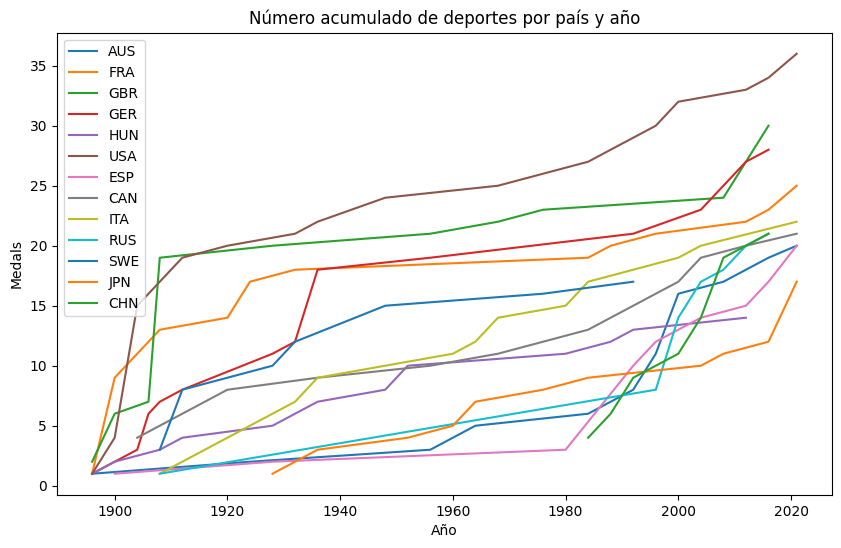

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

# Iteramos sobre los países y creamos una línea para cada uno
for pais in oro_acumulado_por_anio_count_2['NOC'].unique():
    df_pais = oro_acumulado_por_anio_count_2[oro_acumulado_por_anio_count['NOC'] == pais]
    ax.plot(df_pais['Year'], df_pais['Acumulado'], label=pais)

# Configuramos las etiquetas de los ejes y la leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Medals')
ax.set_title('Número acumulado de deportes por país y año')
ax.legend()

# Mostramos el gráfico
plt.show()

In [20]:
# Iteramos sobre los países y creamos una línea para cada uno
fig = go.Figure()
for pais in oro_acumulado_por_anio_count_2['NOC'].unique():
    df_pais = oro_acumulado_por_anio_count_2[oro_acumulado_por_anio_count_2['NOC'] == pais]
    fig.add_trace(go.Scatter(x=df_pais['Year'], y=df_pais['Acumulado'], mode='lines', name=pais))

# Configuramos las etiquetas de los ejes y la leyenda
fig.update_layout(title='Sum of Gold',
                  xaxis_title='Year',
                  yaxis_title='Gold')

# Mostramos el gráfico
fig.show()

pyo.plot(fig, filename='Gold.html')

'Gold.html'

In [21]:
porcentaje_EEUU=pd.read_csv("porcentaje_medallas_eeuu.csv")

In [22]:
porcentaje_EEUU

,Unnamed: 0,Year,Medal_total,Medal_usa,Porcentaje
0,0,1896,143,20,13.986014
1,1,1900,604,63,10.430464
2,2,1904,486,394,81.069959
3,3,1906,458,24,5.240175
4,4,1908,831,65,7.821901
5,5,1912,941,107,11.370882
6,6,1920,1308,194,14.831804
7,7,1924,832,182,21.875000
8,8,1928,734,88,11.989101
9,9,1932,647,189,29.211747


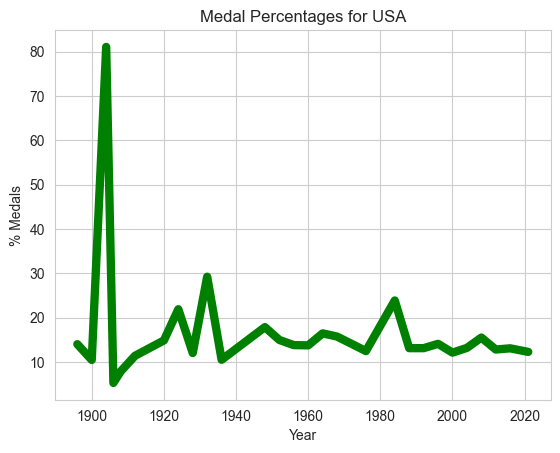

In [25]:
sns.set_style("whitegrid")
sns.lineplot(x="Year", y="Porcentaje", data=porcentaje_EEUU,color="green",linewidth=6)


# Configuramos las etiquetas de los ejes y el título del gráfico
plt.xlabel("Year")
plt.ylabel("% Medals")
plt.title("Medal Percentages for USA")

sns.set_style("whitegrid")
plt.savefig("Medals_USA", transparent=True)

# Mostramos el gráfico
plt.show()

In [58]:
acumulado_por_anio

,NOC,Year,City,Columna2,Sport
0,GRE,1896,Athina,GRE_Swimming,Swimming
1,GRE,1896,Athina,GRE_Gymnastics,Gymnastics
2,GBR,1896,Athina,GBR_Cycling,Cycling
3,USA,1896,Athina,USA_Athletics,Athletics
4,GER,1896,Athina,GER_Gymnastics,Gymnastics
...,...,...,...,...,...
1303,CHN,2021,Tokyo,CHN_3x3 Basketball,3x3 Basketball
1304,TPE,2021,Tokyo,TPE_Karate,Karate
1305,AUS,2021,Tokyo,AUS_Surfing,Surfing
1306,TPE,2021,Tokyo,TPE_Judo,Judo


In [57]:
acumulado_por_anio.groupby("Sport").count()

,NOC,Year,City,Columna2
Sport,,,,
3x3 Basketball,5,5,5,5
Aeronautics,1,1,1,1
Alpinism,2,2,2,2
Archery,24,24,24,24
Art Competitions,23,23,23,23
Athletics,101,101,101,101
Badminton,12,12,12,12
Baseball,7,7,7,7
Basketball,23,23,23,23


In [61]:
medallas_repartidas_por_deporte=medallistas.groupby("Sport").count()

In [67]:
medallas_repartidas_por_deporte=medallas_repartidas_por_deporte.sort_values(by="Medal",ascending=False)

In [81]:
medallas_repartidas_por_deporte_2=medallas_repartidas_por_deporte.nlargest(columns="Medal",n=20)

In [82]:
medallas_repartidas_por_deporte_2

,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Event,Medal
Sport,,,,,,,,,,,
Athletics,4181,4181,4157,3681,3654,4181,4181,4181,4181,4181,4181
Swimming,3292,3292,3271,2579,2488,3292,3292,3292,3292,3292,3292
Rowing,3089,3089,2972,2251,2189,3089,3089,3089,3089,3089,3089
Gymnastics,2323,2323,2252,1266,1164,2323,2323,2323,2323,2323,2323
Fencing,1832,1832,1808,1221,1109,1832,1832,1832,1832,1832,1832
Football,1703,1703,1663,1229,1085,1703,1703,1703,1703,1703,1703
Hockey,1632,1632,1594,1220,1170,1632,1632,1632,1632,1632,1632
Wrestling,1368,1368,1337,1003,988,1368,1368,1368,1368,1368,1368
Cycling,1366,1366,1337,927,847,1366,1366,1366,1366,1366,1366


In [83]:
deportes_mas_medallistas=[]
for i in medallas_repartidas_por_deporte_2.index:
    deportes_mas_medallistas.append(i)

In [84]:
deportes_mas_medallistas

['Athletics',
 'Swimming',
 'Rowing',
 'Gymnastics',
 'Fencing',
 'Football',
 'Hockey',
 'Wrestling',
 'Cycling',
 'Shooting',
 'Sailing',
 'Canoeing',
 'Handball',
 'Basketball',
 'Water Polo',
 'Volleyball',
 'Equestrianism',
 'Boxing',
 'Weightlifting',
 'Judo']

In [85]:
acumulado_por_anio_10=acumulado_por_anio[acumulado_por_anio["Sport"].isin(deportes_mas_medallistas)]

In [86]:
acumulado_por_anio_10["Sport"].unique()

array(['Swimming', 'Gymnastics', 'Cycling', 'Athletics', 'Fencing',
       'Shooting', 'Weightlifting', 'Wrestling', 'Rowing', 'Sailing',
       'Football', 'Equestrianism', 'Water Polo', 'Boxing', 'Hockey',
       'Basketball', 'Canoeing', 'Handball', 'Volleyball', 'Judo'],
      dtype=object)

In [88]:
deportes_universales=acumulado_por_anio_10.groupby("Sport").count()

In [92]:
deportes_universales.sort_values(by="Columna2",ascending=False)

,NOC,Year,City,Columna2
Sport,,,,
Athletics,101,101,101,101
Boxing,81,81,81,81
Shooting,68,68,68,68
Weightlifting,68,68,68,68
Wrestling,64,64,64,64
Judo,56,56,56,56
Swimming,56,56,56,56
Cycling,46,46,46,46
Canoeing,45,45,45,45


In [98]:
deportes_universales.reset_index(inplace=True)

In [106]:
deportes_universales.sort_values(by="Columna2",inplace=True)

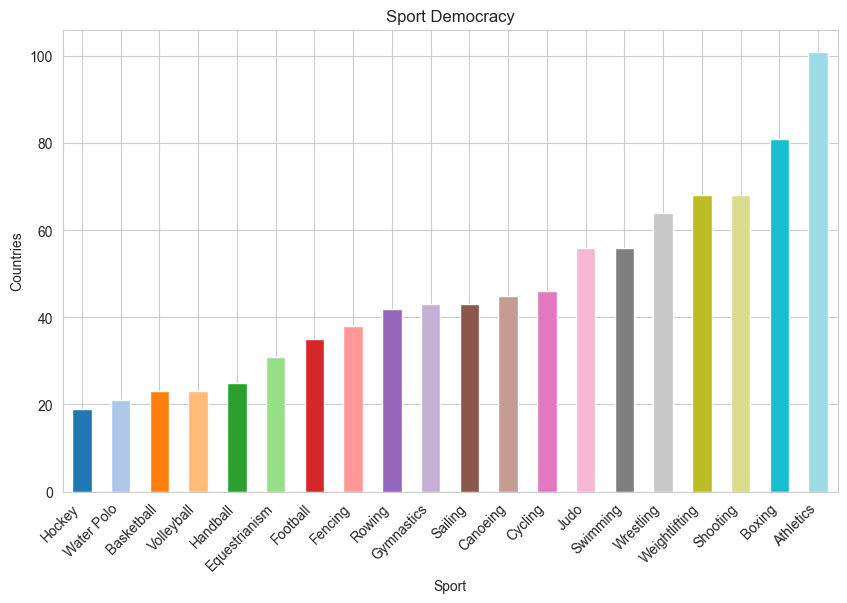

In [117]:

# Crea el gráfico de barras
colores = plt.cm.tab20(range(len(deportes_universales)))
ax = deportes_universales.plot.bar(x="Sport", y='Columna2', color=colores, figsize=(10, 6))

# Añade título y etiquetas a los ejes
ax.set_title('Sport Democracy')
ax.set_xlabel('Sport')
ax.set_ylabel('Countries')
plt.xticks(rotation=45, ha='right')
ax.legend_.remove()

sns.set_style("whitegrid")
plt.savefig("Sport_Democracy_2", transparent=True)

# Muestra el gráfico
plt.show()

---
---

Nuevo gráfico

In [30]:
escala_EEUU=acumulado_por_anio_count_2[acumulado_por_anio_count_2["NOC"]=="USA"]

In [35]:
escala_EEUU

,Year,NOC,Count,Acumulado
9,1896,USA,2,2
32,1900,USA,7,9
38,1904,USA,13,22
65,1908,USA,1,23
81,1912,USA,2,25
101,1920,USA,2,27
161,1932,USA,2,29
183,1936,USA,2,31
285,1964,USA,1,32
383,1984,USA,2,34


In [ ]:
escala_EEUU["nuevas_disc_conquistada"]=[]

In [45]:
disc_conqu=[2]
for i in range(len(escala_EEUU["Acumulado"])):
    if i==0:
        continue
    else:
        disc_conqu.append(escala_EEUU.iloc[i]["Acumulado"]-escala_EEUU.iloc[i-1]["Acumulado"])

In [46]:
disc_conqu

[2, 7, 13, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 5]

In [32]:
escala_EEUU.iloc[0]["Acumulado"]

2

In [43]:
(escala_EEUU.iloc[1]["Acumulado"]-escala_EEUU.iloc[0]["Acumulado"])

7

In [62]:
grupo_df=acumulado_por_anio_count_2.groupby("NOC")

In [63]:
grupo_df.get_group("USA")

,Year,NOC,Count,Acumulado
9,1896,USA,2,2
32,1900,USA,7,9
38,1904,USA,13,22
65,1908,USA,1,23
81,1912,USA,2,25
101,1920,USA,2,27
161,1932,USA,2,29
183,1936,USA,2,31
285,1964,USA,1,32
383,1984,USA,2,34


In [66]:
for grupo, datos_grupo in grupo_df:
    print(f"Grupo: {grupo}")
    print(datos_grupo)

Grupo: AUS
     Year  NOC  Count  Acumulado
0    1896  AUS      2          2
10   1900  AUS      1          3
103  1924  AUS      1          4
127  1928  AUS      2          6
149  1932  AUS      1          7
210  1952  AUS      1          8
232  1956  AUS      3         11
244  1960  AUS      1         12
267  1964  AUS      2         14
361  1984  AUS      1         15
444  1996  AUS      3         18
483  2000  AUS      5         23
536  2004  AUS      1         24
653  2016  AUS      2         26
694  2021  AUS      2         28
Grupo: CAN
     Year  NOC  Count  Acumulado
14   1900  CAN      1          1
34   1904  CAN      4          5
55   1908  CAN      3          8
68   1912  CAN      1          9
84   1920  CAN      2         11
150  1932  CAN      2         13
164  1936  CAN      2         15
213  1952  CAN      1         16
235  1956  CAN      2         18
269  1964  CAN      1         19
364  1984  CAN      2         21
449  1996  CAN      1         22
488  2000  CAN      4

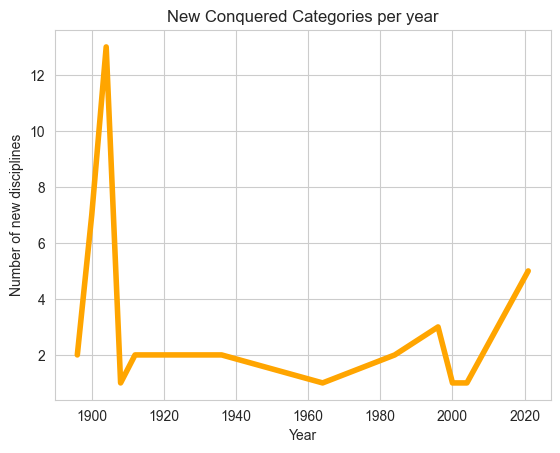

In [81]:
plt.plot(escala_EEUU["Year"], escala_EEUU["Count"], color="orange", linewidth=4)

# Agregar etiquetas de los ejes y título del gráfico
plt.xlabel('Year')
plt.ylabel('Number of new disciplines')
plt.title('New Conquered Categories per year')

sns.set_style("whitegrid")
plt.savefig("New conquered cat per year", transparent=True)

# Mostrar el gráfico
plt.show()

In [65]:
escala_EEUU

,Year,NOC,Count,Acumulado
9,1896,USA,2,2
32,1900,USA,7,9
38,1904,USA,13,22
65,1908,USA,1,23
81,1912,USA,2,25
101,1920,USA,2,27
161,1932,USA,2,29
183,1936,USA,2,31
285,1964,USA,1,32
383,1984,USA,2,34


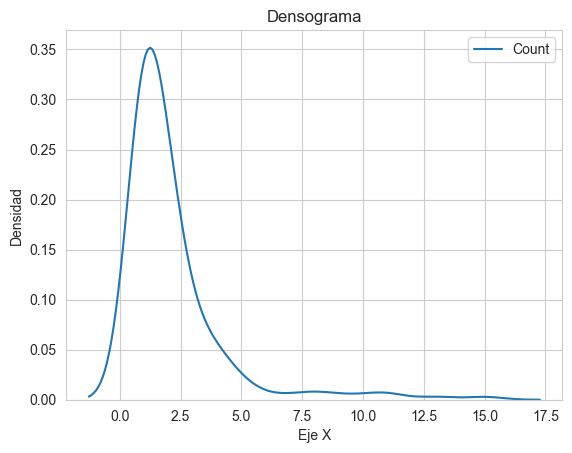

In [73]:
sns.kdeplot(prueba)

# Agregar etiquetas de los ejes y título del gráfico
plt.xlabel('Eje X')
plt.ylabel('Densidad')
plt.title('Densograma')

# Mostrar el gráfico
plt.show()

Text(0.5, 1.0, 'Densograma por País')

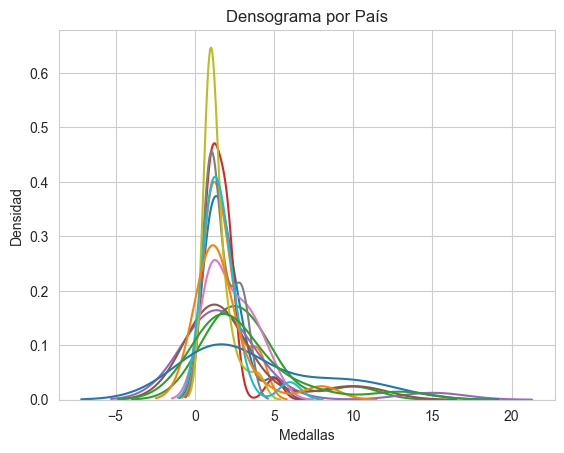

In [75]:
df = pd.DataFrame(prueba)

# Hacer un densograma para cada país en el DataFrame
for pais, datos_pais in df.groupby('NOC'):
    sns.kdeplot(datos_pais['Count'], label=pais)

# Agregar etiquetas de los ejes y título del gráfico
plt.xlabel('Medallas')
plt.ylabel('Densidad')
plt.title('Densograma por País')

In [71]:
prueba=acumulado_por_anio_count_2[["NOC","Count"]]

In [72]:
prueba

,NOC,Count
0,AUS,2
3,FRA,3
4,GBR,4
5,GER,5
7,HUN,3
...,...,...
710,GBR,1
712,HUN,1
715,ITA,1
717,JPN,6


In [83]:
acumulado_por_anio[acumulado_por_anio["NOC"]=="USA"]

,NOC,Year,City,Columna2,Sport
3,USA,1896,Athina,USA_Athletics,Athletics
28,USA,1896,Athina,USA_Shooting,Shooting
35,USA,1900,Paris,USA_Golf,Golf
36,USA,1900,Paris,USA_Rowing,Rowing
67,USA,1900,Paris,USA_Tennis,Tennis
88,USA,1900,Paris,USA_Polo,Polo
89,USA,1900,Paris,USA_Cycling,Cycling
93,USA,1900,Paris,USA_Sailing,Sailing
99,USA,1900,Paris,USA_Rugby,Rugby
105,USA,1904,St. Louis,USA_Swimming,Swimming
